## Trabalho Prático Módulo 2
    Rede neural: classificação básica
        Classificar imagens através do uso de rede neural

In [1]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


##### Importando a base de dados Fashion MNIST

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
len(class_names)

10

In [5]:
len(train_images)

60000

### Explore os dados

###### 60.000 imagens no conjunto de treinamento, e cada imagem é representada em 28 x 28 pixels.

In [6]:
train_images.shape

(60000, 28, 28)

###### Do mesmo modo, existem 60.000 labels no conjunto de treinamento

In [7]:
len(train_images)

60000

###### Cada label é um inteiro entre 0 e 9.

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

###### Existem 10000 imagens no conjunto de teste. Novamente, cada imagem é representada por 28 x 28 pixels.

In [9]:
test_images.shape

(10000, 28, 28)

###### E um conjunto de teste contendo 10000 labels das imagens.


In [10]:
len(test_labels)

10000

### Pré-processando dos dados

Os dados precisam ser pré-processados antes de treinar a rede. Se você inspecionar a
primeira imagem do conjunto de treinamento, você verá que os valores dos pixels estão
entre 0 e 255.

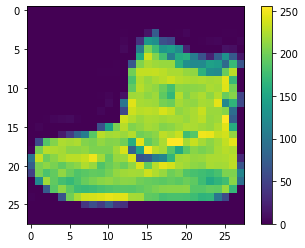

In [11]:
# Plot da primeira peça da base de treino
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escalaremos esses valores no intervalo de 0 e 1 antes de alimentar o modelo da rede
neural. Para fazer isso, dividiremos os valores por 255. É importante que o conjunto de
treinamento e o conjunto de teste podem ser pré-processados do mesmo modo.

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que os dados estão no formato correto e que estamos prontos para
construir e treinar a rede, vamos mostrar as primeiras 25 imagens do conjunto de
treinamento e mostrar o nome das classes de cada imagem abaixo

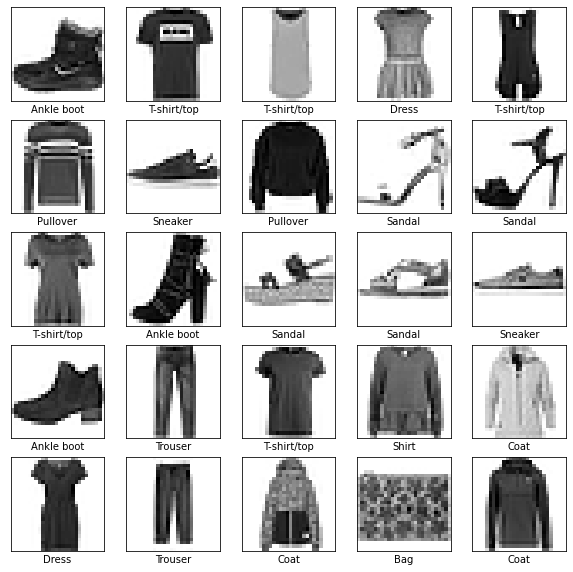

In [13]:
# As primeiras 25 imagens do conjunto de treinamento
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construindo o modelo
Construir a rede neural requer configurar as camadas do modelo e, depois, compilar o
modelo.

### Montando as camadas
O principal bloco de construção da rede neural é a camada (layer). As camadas (layers)
extraem representações dos dados inseridos na rede. Com sorte, essas representações
são significativas para o problema.
Muito do deep learning consiste em encadear simples camadas. Muitas camadas,
como tf.keras.layers.Dense, tem parâmetros que são aprendidos durante o treinamento.

In [14]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
                         ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


A primeira camada da rede, tf.keras.layers.Flatten, transforma o formato da imagem de um array
de imagens de duas dimensões (of 28 by 28 pixels) para um array de uma dimensão (de
28 * 28 = 784 pixels). Pense nessa camada como camadas não empilhadas de pixels de
uma imagem e os enfileire. Essa camada não tem parâmetros para aprender; ela só
reformata os dados.

Depois dos pixels serem achatados, a rede consiste de uma sequência de duas
camadas tf.keras.layers.Dense. Essa são camadas neurais densely connected, ou fully
connected. A primeira camada Dense tem 128 nós (ou neurônios). A segunda (e última)
camada é uma softmax de 10 nós, que retorna um array de 10 probabilidades, cuja soma
resulta em 1. Cada nó contém um valor que indica a probabilidade de que aquela imagem
pertence a uma das 10 classes.

### Compilando o modelo
Antes do modelo estar pronto para o treinamento, são necessárias algumas
configurações. Essas serão adicionadas no passo de compilação:

▪ **Função Loss**: essa função mede quão preciso o modelo é durante o treinamento.
Queremos minimizar a função para guiar o modelo para a direção certa.

▪ **Optimizer**: isso é como o modelo se atualiza com base no dado que ele vê e sua
função loss.

▪ **Métricas**: usada para monitorar os passos de treinamento e teste. O exemplo abaixo
usa a acurácia, a fração das imagens que foram classificadas corretamente.

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Treinando o modelo

Treinar a rede neural requer os seguintes passos:

▪ Alimente o modelo com os dados de treinamento. Neste exemplo, os dados de
treinamento são os arrays train_images e train_labels.

▪ O modelo aprende como associar as imagens as labels.

▪ Perguntamos ao modelo para fazer previsões sobre o conjunto de teste — nesse
exemplo, o array test_images. Verificamos se as previsões combinaram com
as labels do array test_labels.
Para começar a treinar, chame o método model.fit — assim chamado porque ele
“encaixa” o modelo no conjunto de treinamento:

In [16]:
# Realizando treinamento do modelo
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.5010 - accuracy: 0.8232
Epoch 2/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3763 - accuracy: 0.8636
Epoch 3/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3360 - accuracy: 0.8763
Epoch 4/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.3150 - accuracy: 0.8841
Epoch 5/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2969 - accuracy: 0.8903
Epoch 6/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2829 - accuracy: 0.8955
Epoch 7/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2697 - accuracy: 0.9002
Epoch 8/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2583 - accuracy: 0.9044
Epoch 9/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2475 - accuracy: 0.9088
Epoch 10/10
60

À medida que o modelo treina, as métricas loss e acurácia são mostradas. O modelo
atinge uma acurácia de 0.88 (ou 88%) com o conjunto de treinamento.

### Avaliando a acurácia
Compare como o modelo performou com o conjunto de teste.

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3417 - accuracy: 0.8798

Test accuracy: 0.8798


A acurácia com o conjunto de teste é um pouco menor do que a acurácia de treinamento.
Essa diferença entre as duas acurácias representa um overfitting. Overfitting é um modelo
de aprendizado de máquina que performou de maneira pior em um conjunto de entradas
novas e não usadas anteriormente.

### Fazendo predições
Com o modelo treinado, o usaremos para predições de algumas imagens.

In [18]:
# Fazendo as predições com o dataset de teste
predictions = model.predict(test_images)

Aqui, o modelo previu a label de cada imagem no conjunto de treinamento. Vamos olhar
na primeira predição.

In [19]:
# Selecionando a primeira imagem do teste
predictions[0]

array([1.4056424e-06, 1.6742500e-07, 3.3301484e-09, 3.8231295e-08,
       5.3320166e-09, 9.5001789e-04, 6.8241022e-08, 4.8301523e-03,
       2.0672650e-07, 9.9421787e-01], dtype=float32)

A predição é um array de 10 números. Eles representam uma confiança do modelo que a
imagem corresponde a cada um dos diferentes artigos de roupa. Podemos ver que
cada label tem um maior valor de confiança.

In [20]:
# A classe com maior probabilidade da primeira imagem
np.argmax(predictions[0])

9

Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10
classes

In [21]:
# Função para plot da imagem
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Função para plot com as probabilidades
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Vamos olhar a previsão imagem na posição 0, do array de predição

###### Predição Correta

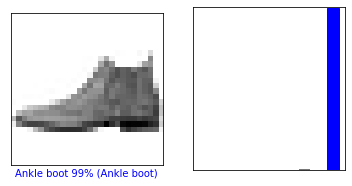

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

###### Predição incorreta

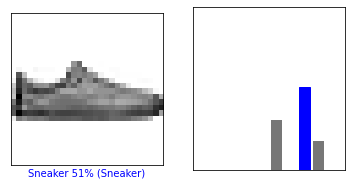

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Vamos plotar algumas das previsões do modelo. Labels preditas corretamente são azuis
e as predições erradas são vermelhas. O número dá a porcentagem (de 100) das labels
preditas. Note que o modelo pode errar.

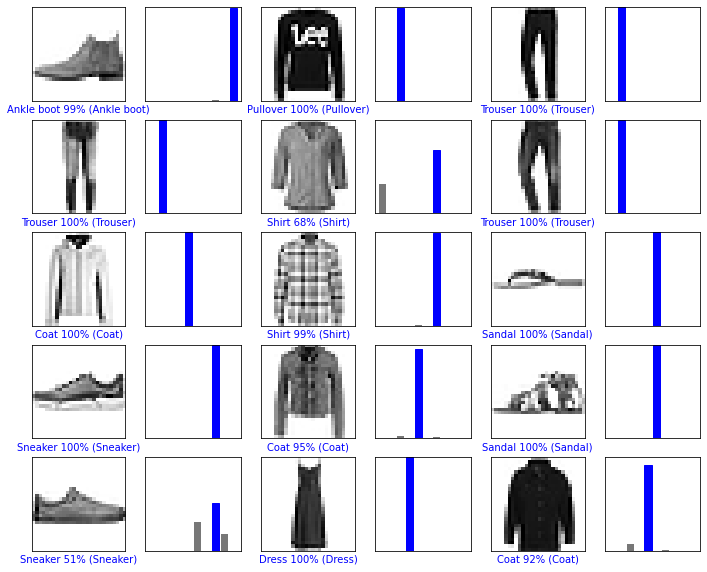

In [24]:
# Labels preditas corretamente são azuis e as predições erradas são vermelhas
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finamente, use o modelo treinado para fazer a predição de uma única imagem.

In [25]:
# Selecionando apenas uma imagem test dataset.
img = test_images[0]
print('Shape da imagem teste de exemplo:', img.shape)

Shape da imagem teste de exemplo: (28, 28)


Modelos tf.keras são otimizados para fazer predições em batch, ou coleções, de
exemplos de uma vez. De acordo, mesmo que usemos uma única imagem, precisamos
adicionar em uma lista.

In [26]:
# Adicionando a imagem em um batch que possui um só membro, formato para entrada na rede neural
img = (np.expand_dims(img,0))
print('Imagem no formato de entrada para a Rede Neural:', img.shape)

Imagem no formato de entrada para a Rede Neural: (1, 28, 28)


Agora faremos a predição da label correta para essa imagem

In [27]:
predictions_single = model.predict(img)
print('Array com as probabilidades de cada classe:', predictions_single)

Array com as probabilidades de cada classe: [[1.4056450e-06 1.6742564e-07 3.3301546e-09 3.8231370e-08 5.3320166e-09
  9.5001789e-04 6.8241157e-08 4.8301569e-03 2.0672651e-07 9.9421787e-01]]


Classe prevista: 9


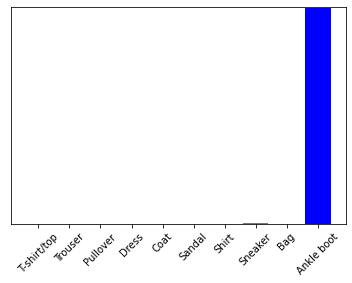

In [28]:
print('Classe prevista:', np.argmax(predictions_single[0]))

# Plote com as probabilidades de cada classe
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

model.predict retorna a lista de listas — uma lista para cada imagem em um batch de
dados. Pegue a predição de nossa (única) imagem no batch.

In [29]:
print('Classe prevista:', np.argmax(predictions_single[0]))

Classe prevista: 9
